<a href="https://colab.research.google.com/github/Mbenyedder/tweet-sentiment-/blob/master/TP_3_tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go
%matplotlib inline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Monte votre Google Drive sur le serveur.
drive.mount("/content/MyDrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive/


In [0]:
Df_train = pd.read_csv('/content/MyDrive/My Drive/train.csv')
Df_test = pd.read_csv('/content/MyDrive/My Drive/test.csv')

In [7]:
Df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [17]:
Df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [16]:
#Regardons la distribution des tweets dans le train
temp1 = Df_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp1.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [18]:
#Regardons la distribution des tweets dans le test
temp2 = Df_test.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp2.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,1430
2,positive,1103
0,negative,1001


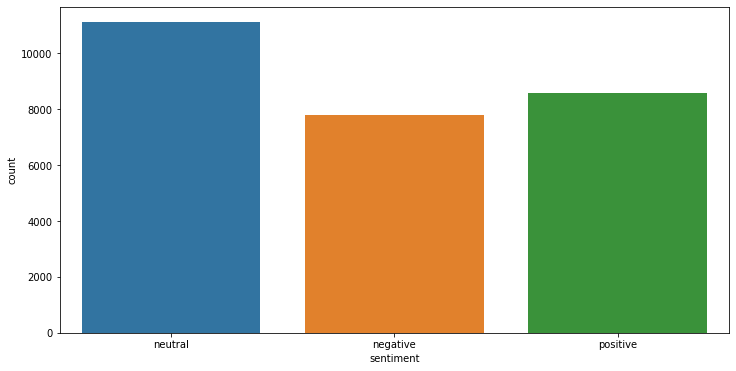

In [19]:
#train
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=Df_train)

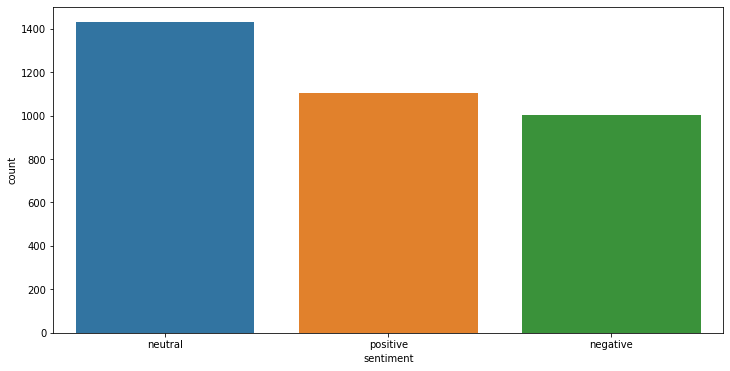

In [20]:
#test
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=Df_test)

In [21]:
#Dessinons un Funnel-Chart pour une meilleure visualisation (train)
fig = go.Figure(go.Funnelarea(
    text =temp1.sentiment,
    values = temp1.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [22]:
#Dessinons un Funnel-Chart pour une meilleure visualisation (test)
fig = go.Figure(go.Funnelarea(
    text =temp2.sentiment,
    values = temp2.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [0]:
Df_train.replace({"sentiment":{"positive":2, "neutral":1, "negative":0}}, inplace=True)
Df_test.replace({"sentiment":{"positive":2, "neutral":1, "negative":0}}, inplace=True)

In [24]:
Df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0


In [25]:
Df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,1
1,96d74cb729,Shanghai is also really exciting (precisely -...,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0
3,01082688c6,happy bday!,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,2


In [0]:
Df_train['text'] = Df_train['text'].str.lower()
Df_train['text'] = Df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',str(x))))

In [0]:
Df_test['text'] = Df_test['text'].str.lower()
Df_test['text'] = Df_test['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [0]:
X_train = Df_train.text
y_test=Df_test.sentiment
y_train = Df_train.sentiment
tokenize = Tokenizer()
tokenize.fit_on_texts(X_train.values)

In [0]:
X_test = Df_test.text

X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)

In [0]:
max_len= max([len(s.split()) for s in Df_train['text']])
X_train = pad_sequences(X_train, max_len)
X_test = pad_sequences(X_test, max_len)

In [0]:
max_features = len(tokenize.word_index)+1
model=Sequential()
model.add(Embedding(max_features,100,input_length=max_len))
model.add(LSTM(64,dropout=0.3,return_sequences=True))
model.add(LSTM(32,dropout=0.4,return_sequences=False))
model.add(Dense(3,activation='softmax'))

In [32]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 100)           2872900   
_________________________________________________________________
lstm (LSTM)                  (None, 33, 64)            42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 2,927,655
Trainable params: 2,927,655
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(X_train, y_train,batch_size=128, epochs=10,  verbose=1)

Epoch 1/10
215/215 [==============================] - 25s 118ms/step - loss: 0.8866 - accuracy: 0.5668
Epoch 2/10
215/215 [==============================] - 29s 137ms/step - loss: 0.6149 - accuracy: 0.7481
Epoch 3/10
215/215 [==============================] - 25s 115ms/step - loss: 0.4593 - accuracy: 0.8221
Epoch 4/10
215/215 [==============================] - 25s 115ms/step - loss: 0.3515 - accuracy: 0.8717
Epoch 5/10
215/215 [==============================] - 25s 115ms/step - loss: 0.2837 - accuracy: 0.9000
Epoch 6/10
215/215 [==============================] - 24s 114ms/step - loss: 0.2348 - accuracy: 0.9180
Epoch 7/10
215/215 [==============================] - 25s 114ms/step - loss: 0.2008 - accuracy: 0.9284
Epoch 8/10
215/215 [==============================] - 25s 114ms/step - loss: 0.1729 - accuracy: 0.9394
Epoch 9/10
215/215 [==============================] - 25s 114ms/step - loss: 0.1473 - accuracy: 0.9487
Epoch 10/10
215/215 [==============================] - 25s 115ms/step - l

In [39]:
y_pred_train = model.predict_classes(X_train)
y_pred_test = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [40]:
print(y_pred_test)

[1 2 0 ... 0 2 1]


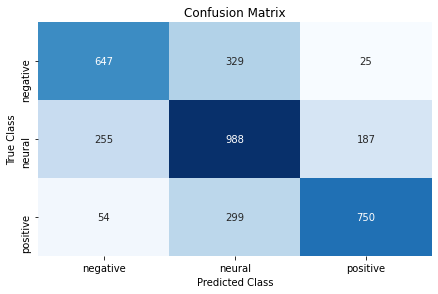

In [41]:
from sklearn.metrics import confusion_matrix
class_names = ['negative', 'neural','positive']
matrix = confusion_matrix(y_test, y_pred_test)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()